In [66]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [67]:
df_competencia_scrapping = pd.read_pickle("../data/web_scrapping/hoteles_competencia_info_scrapping.pkl")
df_competencia_scrapping

,nombre,rating,precio_noche,fecha_reserva
0,Novotel Madrid Center,4.6,255,2025-02-26
1,ibis budget Madrid Calle 30,4.4,110,2025-02-26
2,ibis budget Madrid Centro las Ventas,4.3,119,2025-02-26
3,Novotel Madrid City Las Ventas,4.6,173,2025-02-26
4,ibis budget Madrid Calle Alcalá,4.3,95,2025-02-26
5,ibis Madrid Calle Alcalá,4.5,119,2025-02-26
6,ibis budget Madrid Vallecas,4.3,107,2025-02-26
7,Pullman Madrid Airport & Feria,4.2,129,2025-02-26
8,Novotel Madrid Campo de las Naciones,4.5,154,2025-02-26
9,ibis Madrid Aeropuerto Barajas,4.4,116,2025-02-26


In [68]:
df_competencia_scrapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nombre         10 non-null     object        
 1   rating         10 non-null     float64       
 2   precio_noche   10 non-null     int64         
 3   fecha_reserva  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 452.0+ bytes


In [69]:
df_competencia = pd.read_pickle("../data/limpieza/hoteles_competencia.pkl")
df_competencia.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
0,5256cc90-139b-43d2-8ec5-412495d751cf,5311,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,Madrid,Feliciana Cantón,Feliciana Cantón feliciana.cantón@example.com
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,8310,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,Madrid,Leonardo Hierro,Leonardo Hierro leonardo.hierro@example.com
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,8047,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,Madrid,Judith Rivas,Judith Rivas judith.rivas@example.com
9,458029ad-cc9b-4d85-8290-fec170bcc02d,204,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,Madrid,Adolfo Cuervo,Adolfo Cuervo adolfo.cuervo@example.com
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,9762,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,Madrid,María Carmen Navarro,María Carmen Navarro maría carmen.navarro@exam...


In [70]:
df_competencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5172 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_reserva            5172 non-null   object        
 1   id_cliente            5172 non-null   int64         
 2   nombre                5172 non-null   object        
 3   apellido              5172 non-null   object        
 4   mail                  5172 non-null   object        
 5   competencia           5172 non-null   bool          
 6   fecha_reserva         0 non-null      datetime64[ns]
 7   inicio_estancia       5172 non-null   datetime64[ns]
 8   final_estancia        5172 non-null   datetime64[ns]
 9   id_hotel              5172 non-null   int64         
 10  precio_noche          0 non-null      float64       
 11  nombre_hotel          5172 non-null   object        
 12  estrellas             0 non-null      float64       
 13  ciudad                

In [71]:
df_propios = pd.read_pickle("../data/limpieza/hoteles_propios.pkl")
df_propios.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,9063,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,12,119.96,Hotel Monte Verde,3.10,Madrid,Maite Calatayud,Maite Calatayud maite.calatayud@example.com
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,211.53,Hotel Brisas del Mar,3.09,Madrid,Tecla Bonet,Tecla Bonet tecla.bonet@example.com
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,378.37,Hotel Camino del Sol,3.07,Madrid,Amílcar Andrés,Amílcar Andrés amílcar.andrés@example.com
5,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,7371,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,14,85.45,Hotel Puerta del Cielo,3.03,Madrid,Joan Vazquez,Joan Vazquez joan.vazquez@example.com
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,309.80,Hotel Encanto Real,3.03,Madrid,Chelo Flor,Chelo Flor chelo.flor@example.com


In [72]:
df_propios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9828 entries, 2 to 14999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_reserva            9828 non-null   object        
 1   id_cliente            9828 non-null   int64         
 2   nombre                9828 non-null   object        
 3   apellido              9828 non-null   object        
 4   mail                  9828 non-null   object        
 5   competencia           9828 non-null   bool          
 6   fecha_reserva         9828 non-null   datetime64[ns]
 7   inicio_estancia       9828 non-null   datetime64[ns]
 8   final_estancia        9828 non-null   datetime64[ns]
 9   id_hotel              9828 non-null   int64         
 10  precio_noche          9828 non-null   float64       
 11  nombre_hotel          9828 non-null   object        
 12  estrellas             9828 non-null   float64       
 13  ciudad                

In [73]:
nulos_porcentaje = round((df_propios.isnull().sum() / len(df_propios)) * 100, 2)
nulos_porcentaje = nulos_porcentaje[nulos_porcentaje > 0]
print(nulos_porcentaje)

Series([], dtype: float64)


In [74]:
df_id_hotel = df_competencia.groupby(["id_hotel"]).count()
df_id_hotel

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
id_hotel,,,,,,,,,,,,,,,
103,533,533,533,533,533,533,0,533,533,0,533,0,533,533,533
113,515,515,515,515,515,515,0,515,515,0,515,0,515,515,515
114,537,537,537,537,537,537,0,537,537,0,537,0,537,537,537
117,489,489,489,489,489,489,0,489,489,0,489,0,489,489,489
128,530,530,530,530,530,530,0,530,530,0,530,0,530,530,530
131,524,524,524,524,524,524,0,524,524,0,524,0,524,524,524
135,518,518,518,518,518,518,0,518,518,0,518,0,518,518,518
181,493,493,493,493,493,493,0,493,493,0,493,0,493,493,493
186,522,522,522,522,522,522,0,522,522,0,522,0,522,522,522


In [75]:
hoteles_competencia = df_competencia.groupby('id_hotel')

valores = df_competencia_scrapping[["nombre", "rating", "precio_noche", "fecha_reserva"]].values.tolist()


# Iterar sobre los grupos y asignar valores secuenciales
for i, (id_hotel, grupos_df_competencia) in enumerate(hoteles_competencia):

    # Obtener valores de df_competencia_scrapping
    nombre = valores[i][0]
    rating = valores[i][1]
    precio_noche = valores[i][2]
    fecha_reserva = valores[i][3]

    
    # Asignar los valores a los registros del grupo:

    # Asignamos a la columna nombre_hotel del df_competencia agrupados por id_hotel el nombre del elemento id de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'nombre_hotel'] = nombre

    # Asignamos a la columna estrellas del df_competencia agrupados por id_hotel las estrellas del elemento i de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'estrellas'] = rating

    # Asignamos a la columna precio_noche del df_competencia agrupados por id_hotel el precio_noche del elemento i de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'precio_noche'] = precio_noche

    # Asignamos a la columna fecha_reserva del df_competencia agrupados por id_hotel la fecha_reserva del elemento i de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'fecha_reserva'] = fecha_reserva




In [76]:
df_competencia.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
0,5256cc90-139b-43d2-8ec5-412495d751cf,5311,Feliciana,Cantón,feliciana.cantón@example.com,True,2025-02-26,2025-03-01,2025-03-02,113,110.0,ibis budget Madrid Calle 30,4.4,Madrid,Feliciana Cantón,Feliciana Cantón feliciana.cantón@example.com
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,8310,Leonardo,Hierro,leonardo.hierro@example.com,True,2025-02-26,2025-03-01,2025-03-02,194,116.0,ibis Madrid Aeropuerto Barajas,4.4,Madrid,Leonardo Hierro,Leonardo Hierro leonardo.hierro@example.com
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,8047,Judith,Rivas,judith.rivas@example.com,True,2025-02-26,2025-03-01,2025-03-02,131,119.0,ibis Madrid Calle Alcalá,4.5,Madrid,Judith Rivas,Judith Rivas judith.rivas@example.com
9,458029ad-cc9b-4d85-8290-fec170bcc02d,204,Adolfo,Cuervo,adolfo.cuervo@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.0,ibis budget Madrid Centro las Ventas,4.3,Madrid,Adolfo Cuervo,Adolfo Cuervo adolfo.cuervo@example.com
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,9762,María Carmen,Navarro,maría carmen.navarro@example.com,True,2025-02-26,2025-03-01,2025-03-02,103,255.0,Novotel Madrid Center,4.6,Madrid,María Carmen Navarro,María Carmen Navarro maría carmen.navarro@exam...


In [77]:
df_hoteles_id = df_competencia.groupby(["nombre_hotel", "id_hotel"]).count()
df_hoteles_id

,,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,precio_noche,estrellas,ciudad,nombre_completo,nombre_completo_mail
nombre_hotel,id_hotel,,,,,,,,,,,,,,
Novotel Madrid Campo de las Naciones,186,522,522,522,522,522,522,522,522,522,522,522,522,522,522
Novotel Madrid Center,103,533,533,533,533,533,533,533,533,533,533,533,533,533,533
Novotel Madrid City Las Ventas,117,489,489,489,489,489,489,489,489,489,489,489,489,489,489
Pullman Madrid Airport & Feria,181,493,493,493,493,493,493,493,493,493,493,493,493,493,493
ibis Madrid Aeropuerto Barajas,194,511,511,511,511,511,511,511,511,511,511,511,511,511,511
ibis Madrid Calle Alcalá,131,524,524,524,524,524,524,524,524,524,524,524,524,524,524
ibis budget Madrid Calle 30,113,515,515,515,515,515,515,515,515,515,515,515,515,515,515
ibis budget Madrid Calle Alcalá,128,530,530,530,530,530,530,530,530,530,530,530,530,530,530
ibis budget Madrid Centro las Ventas,114,537,537,537,537,537,537,537,537,537,537,537,537,537,537


- Confirmamos que hay un id para cada uno de los 10 hoteles de la competencia

In [78]:
nulos_porcentaje = round((df_competencia.isnull().sum() / len(df_competencia)) * 100, 2)
nulos_porcentaje = nulos_porcentaje[nulos_porcentaje > 0]
print(nulos_porcentaje)

Series([], dtype: float64)


In [79]:
df_competencia["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [80]:
fecha_inicio = df_competencia["inicio_estancia"].dropna().unique()[0]
df_competencia["inicio_estancia"] = df_competencia["inicio_estancia"].fillna(fecha_inicio)

In [81]:
df_competencia["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [82]:
df_competencia["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00']
Length: 1, dtype: datetime64[ns]

In [83]:
fecha_fin = df_competencia["final_estancia"].dropna().unique()[0]
df_competencia["final_estancia"] = df_competencia["final_estancia"].fillna(fecha_fin)

In [84]:
df_competencia["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00']
Length: 1, dtype: datetime64[ns]

In [85]:
nulos_porcentaje = round((df_competencia.isnull().sum() / len(df_competencia)) * 100, 2)
nulos_porcentaje = nulos_porcentaje[nulos_porcentaje > 0]
print(nulos_porcentaje)

Series([], dtype: float64)


- Sin nulos enn ningún dataframe

In [86]:
df_competencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5172 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_reserva            5172 non-null   object        
 1   id_cliente            5172 non-null   int64         
 2   nombre                5172 non-null   object        
 3   apellido              5172 non-null   object        
 4   mail                  5172 non-null   object        
 5   competencia           5172 non-null   bool          
 6   fecha_reserva         5172 non-null   datetime64[ns]
 7   inicio_estancia       5172 non-null   datetime64[ns]
 8   final_estancia        5172 non-null   datetime64[ns]
 9   id_hotel              5172 non-null   int64         
 10  precio_noche          5172 non-null   float64       
 11  nombre_hotel          5172 non-null   object        
 12  estrellas             5172 non-null   float64       
 13  ciudad                

In [87]:
df_propios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9828 entries, 2 to 14999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_reserva            9828 non-null   object        
 1   id_cliente            9828 non-null   int64         
 2   nombre                9828 non-null   object        
 3   apellido              9828 non-null   object        
 4   mail                  9828 non-null   object        
 5   competencia           9828 non-null   bool          
 6   fecha_reserva         9828 non-null   datetime64[ns]
 7   inicio_estancia       9828 non-null   datetime64[ns]
 8   final_estancia        9828 non-null   datetime64[ns]
 9   id_hotel              9828 non-null   int64         
 10  precio_noche          9828 non-null   float64       
 11  nombre_hotel          9828 non-null   object        
 12  estrellas             9828 non-null   float64       
 13  ciudad                

In [88]:
df_competencia["estrellas"].describe()

count    5172.000000
mean        4.410035
std         0.129254
min         4.200000
25%         4.300000
50%         4.400000
75%         4.500000
max         4.600000
Name: estrellas, dtype: float64

In [97]:
df_final = pd.concat([df_propios, df_competencia], ignore_index=True)
df_final

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,nombre_completo,nombre_completo_mail
0,40c4cb55-d1f5-407b-832f-4756b8ff77b4,9063,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,12,119.96,Hotel Monte Verde,3.10,Madrid,Maite Calatayud,Maite Calatayud maite.calatayud@example.com
1,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,211.53,Hotel Brisas del Mar,3.09,Madrid,Tecla Bonet,Tecla Bonet tecla.bonet@example.com
2,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,378.37,Hotel Camino del Sol,3.07,Madrid,Amílcar Andrés,Amílcar Andrés amílcar.andrés@example.com
3,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,7371,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,14,85.45,Hotel Puerta del Cielo,3.03,Madrid,Joan Vazquez,Joan Vazquez joan.vazquez@example.com
4,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,309.80,Hotel Encanto Real,3.03,Madrid,Chelo Flor,Chelo Flor chelo.flor@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,e856adee-838c-4031-920c-05ec5f1e32e6,7312,Jesusa,Espinosa,jesusa.espinosa@example.com,True,2025-02-26,2025-03-01,2025-03-02,135,107.00,ibis budget Madrid Vallecas,4.30,Madrid,Jesusa Espinosa,Jesusa Espinosa jesusa.espinosa@example.com
14996,77134049-6e4f-49b0-a6f8-93b7466b1c22,3479,Cruz,Hurtado,cruz.hurtado@example.com,True,2025-02-26,2025-03-01,2025-03-02,128,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,Cruz Hurtado,Cruz Hurtado cruz.hurtado@example.com
14997,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,7539,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,2025-02-26,2025-03-01,2025-03-02,186,154.00,Novotel Madrid Campo de las Naciones,4.50,Madrid,Jose Francisco Cortes,Jose Francisco Cortes jose francisco.cortes@ex...
14998,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,13982,Toño,Narváez,toño.narváez@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.00,ibis budget Madrid Centro las Ventas,4.30,Madrid,Toño Narváez,Toño Narváez toño.narváez@example.com


In [98]:
df_final.to_pickle("../data/limpieza/hoteles.pkl")

## GRÁFICOS

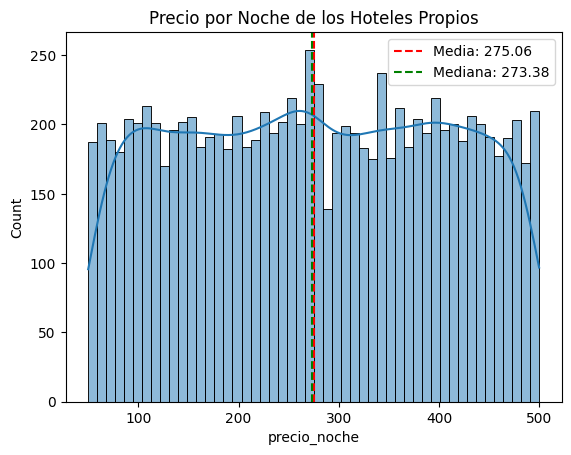

In [89]:
media = np.mean(df_propios["precio_noche"])
mediana = np.median(df_propios["precio_noche"])

sns.histplot(df_propios["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles Propios")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

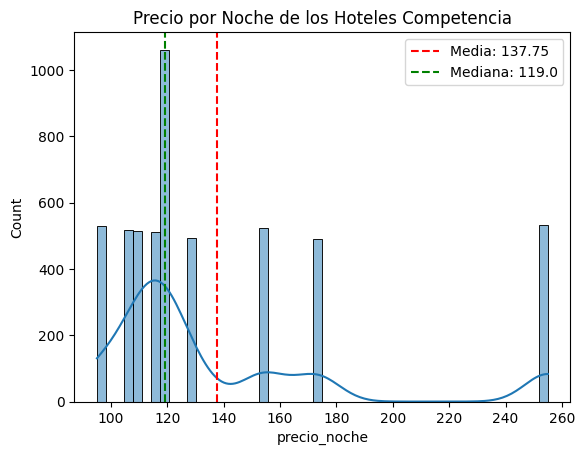

In [90]:
media = np.mean(df_competencia["precio_noche"])
mediana = np.median(df_competencia["precio_noche"])

sns.histplot(df_competencia["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles Competencia")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

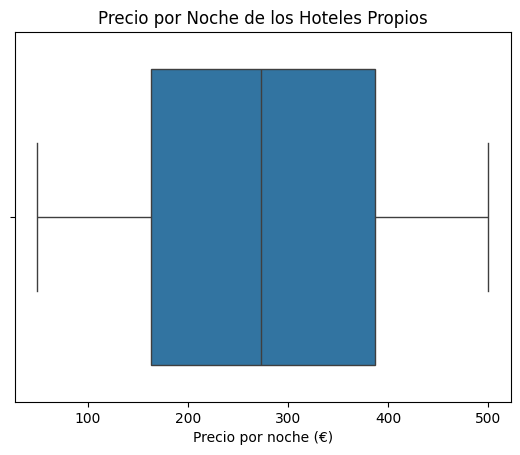

In [91]:
sns.boxplot(x=df_propios["precio_noche"])
plt.title("Precio por Noche de los Hoteles Propios")
plt.xlabel("Precio por noche (€)")
plt.show()

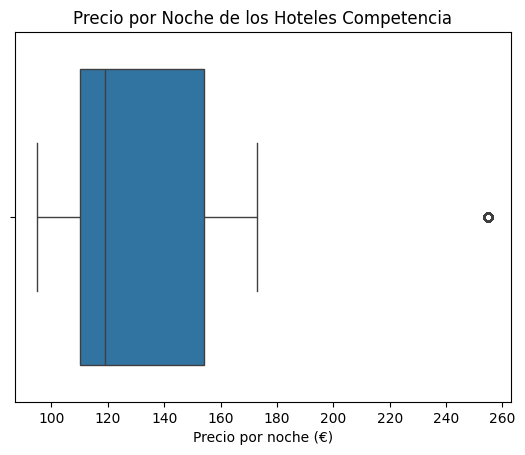

In [92]:
sns.boxplot(x=df_competencia["precio_noche"])
plt.title("Precio por Noche de los Hoteles Competencia")
plt.xlabel("Precio por noche (€)")
plt.show()

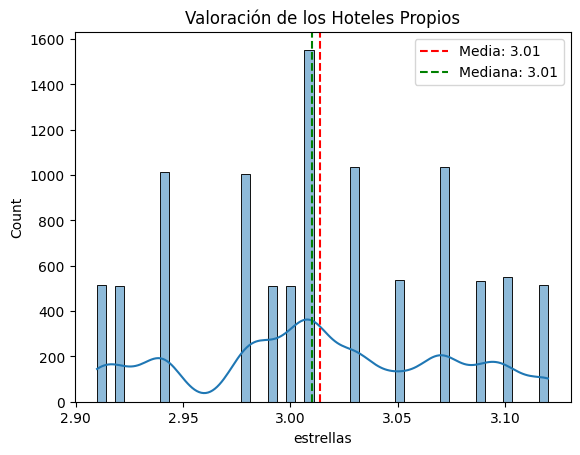

In [93]:
media = np.mean(df_propios["estrellas"])
mediana = np.median(df_propios["estrellas"])

sns.histplot(df_propios["estrellas"], bins=50, kde=True)
plt.title("Valoración de los Hoteles Propios")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

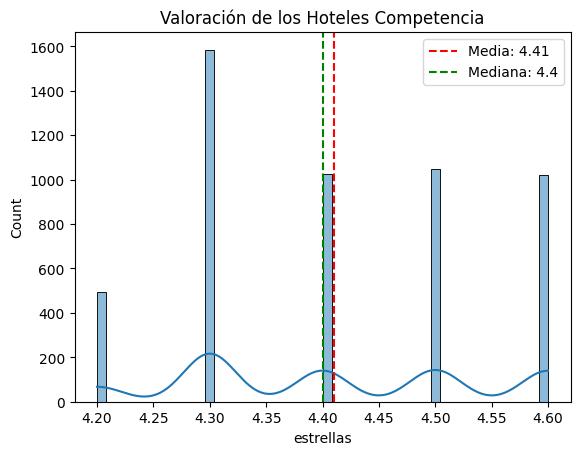

In [95]:
media = np.mean(df_competencia["estrellas"])
mediana = np.median(df_competencia["estrellas"])

sns.histplot(df_competencia["estrellas"], bins=50, kde=True)
plt.title("Valoración de los Hoteles Competencia")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

Text(0.5, 1.0, 'Valoración media de los Hoteles Propios')

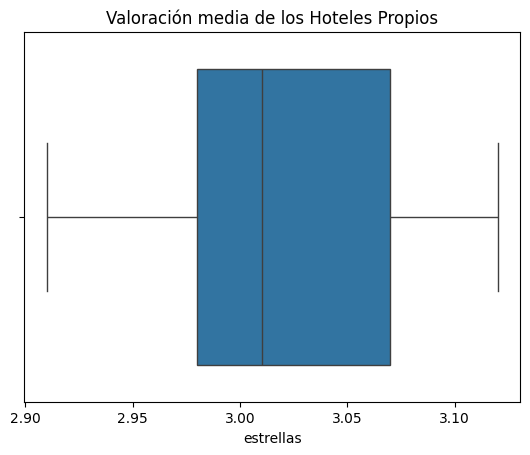

In [94]:
sns.boxplot(x=df_propios["estrellas"])
plt.title("Valoración media de los Hoteles Propios")


Text(0.5, 1.0, 'Valoración media de los Hoteles Competencia')

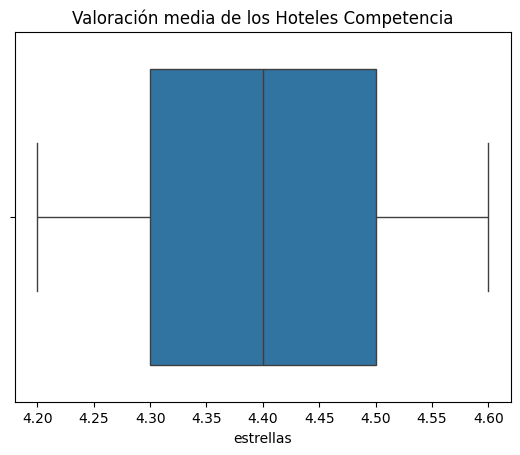

In [96]:
sns.boxplot(x=df_competencia["estrellas"])
plt.title("Valoración media de los Hoteles Competencia")


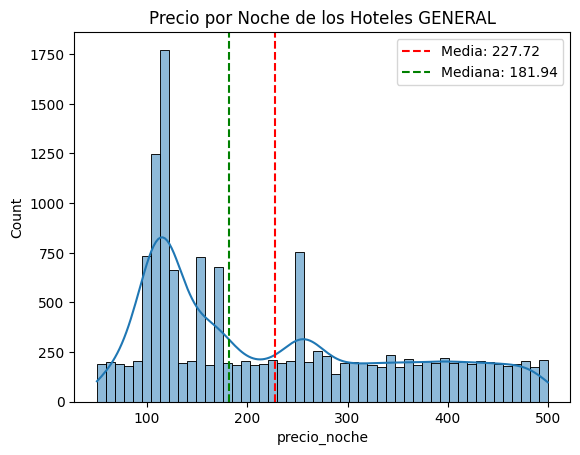

In [99]:
media = np.mean(df_final["precio_noche"])
mediana = np.median(df_final["precio_noche"])

sns.histplot(df_final["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

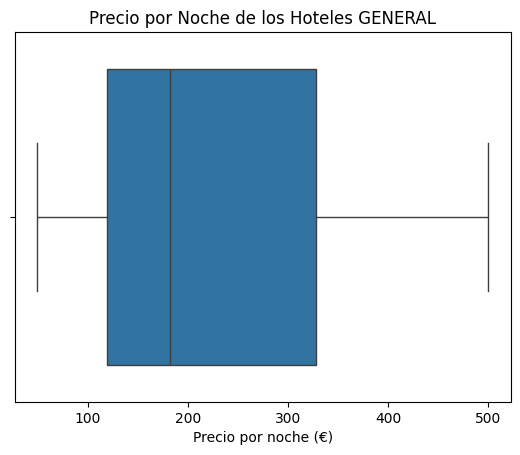

In [100]:
sns.boxplot(x=df_final["precio_noche"])
plt.title("Precio por Noche de los Hoteles GENERAL")
plt.xlabel("Precio por noche (€)")
plt.show()

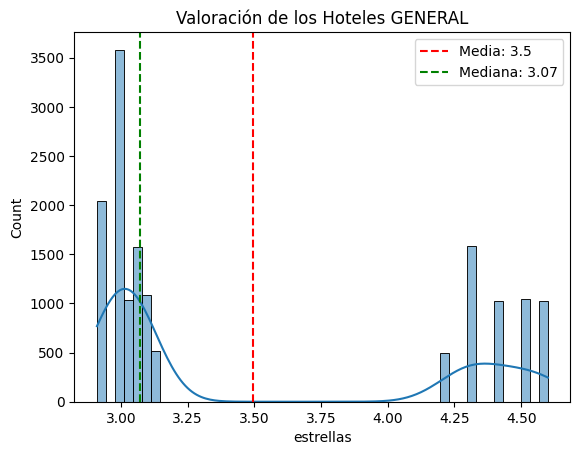

In [101]:
media = np.mean(df_final["estrellas"])
mediana = np.median(df_final["estrellas"])

sns.histplot(df_final["estrellas"], bins=50, kde=True)
plt.title("Valoración de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

Text(0.5, 1.0, 'Valoración media de los Hoteles GENERAL')

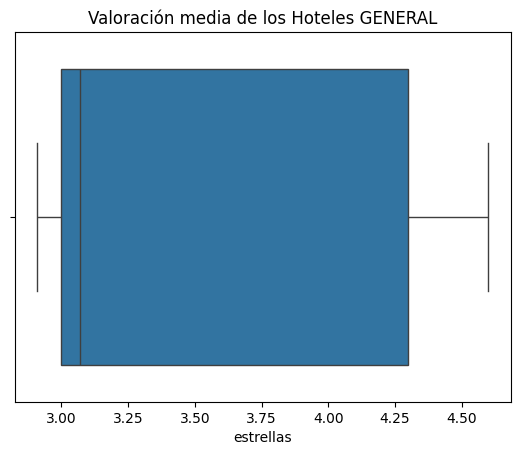

In [102]:
sns.boxplot(x=df_final["estrellas"])
plt.title("Valoración media de los Hoteles GENERAL")
